<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PS1                    2205 non-null   float64
 1   PS2                    2205 non-null   float64
 2   PS3                    2205 non-null   float64
 3   PS4                    2205 non-null   float64
 4   PS5                    2205 non-null   float64
 5   PS6                    2205 non-null   float64
 6   ESP1                   2205 non-null   float64
 7   FS1                    2205 non-null   float64
 8   FS2                    2205 non-null   float64
 9   TS1                    2205 non-null   float64
 10  TS2                    2205 non-null   float64
 11  TS3                    2205 non-null   float64
 12  TS4                    2205 non-null   float64
 13  VS1                    2205 non-null   float64
 14  CE                     2205 non-null   float64
 15  CP  

C:\Users\SystemDynamicsLab\AppData\Local\Temp\ipykernel_7708\1813840303.py:192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_corr_target.drop(["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"],axis=0,inplace=True)


,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.576950,39.601350,1.862750,59.157183
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,0.565850,25.786433,1.255550,59.335617
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,0.576533,22.218233,1.113217,59.543150
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,0.569267,20.459817,1.062150,59.794900
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,0.577367,19.787017,1.070467,59.455267


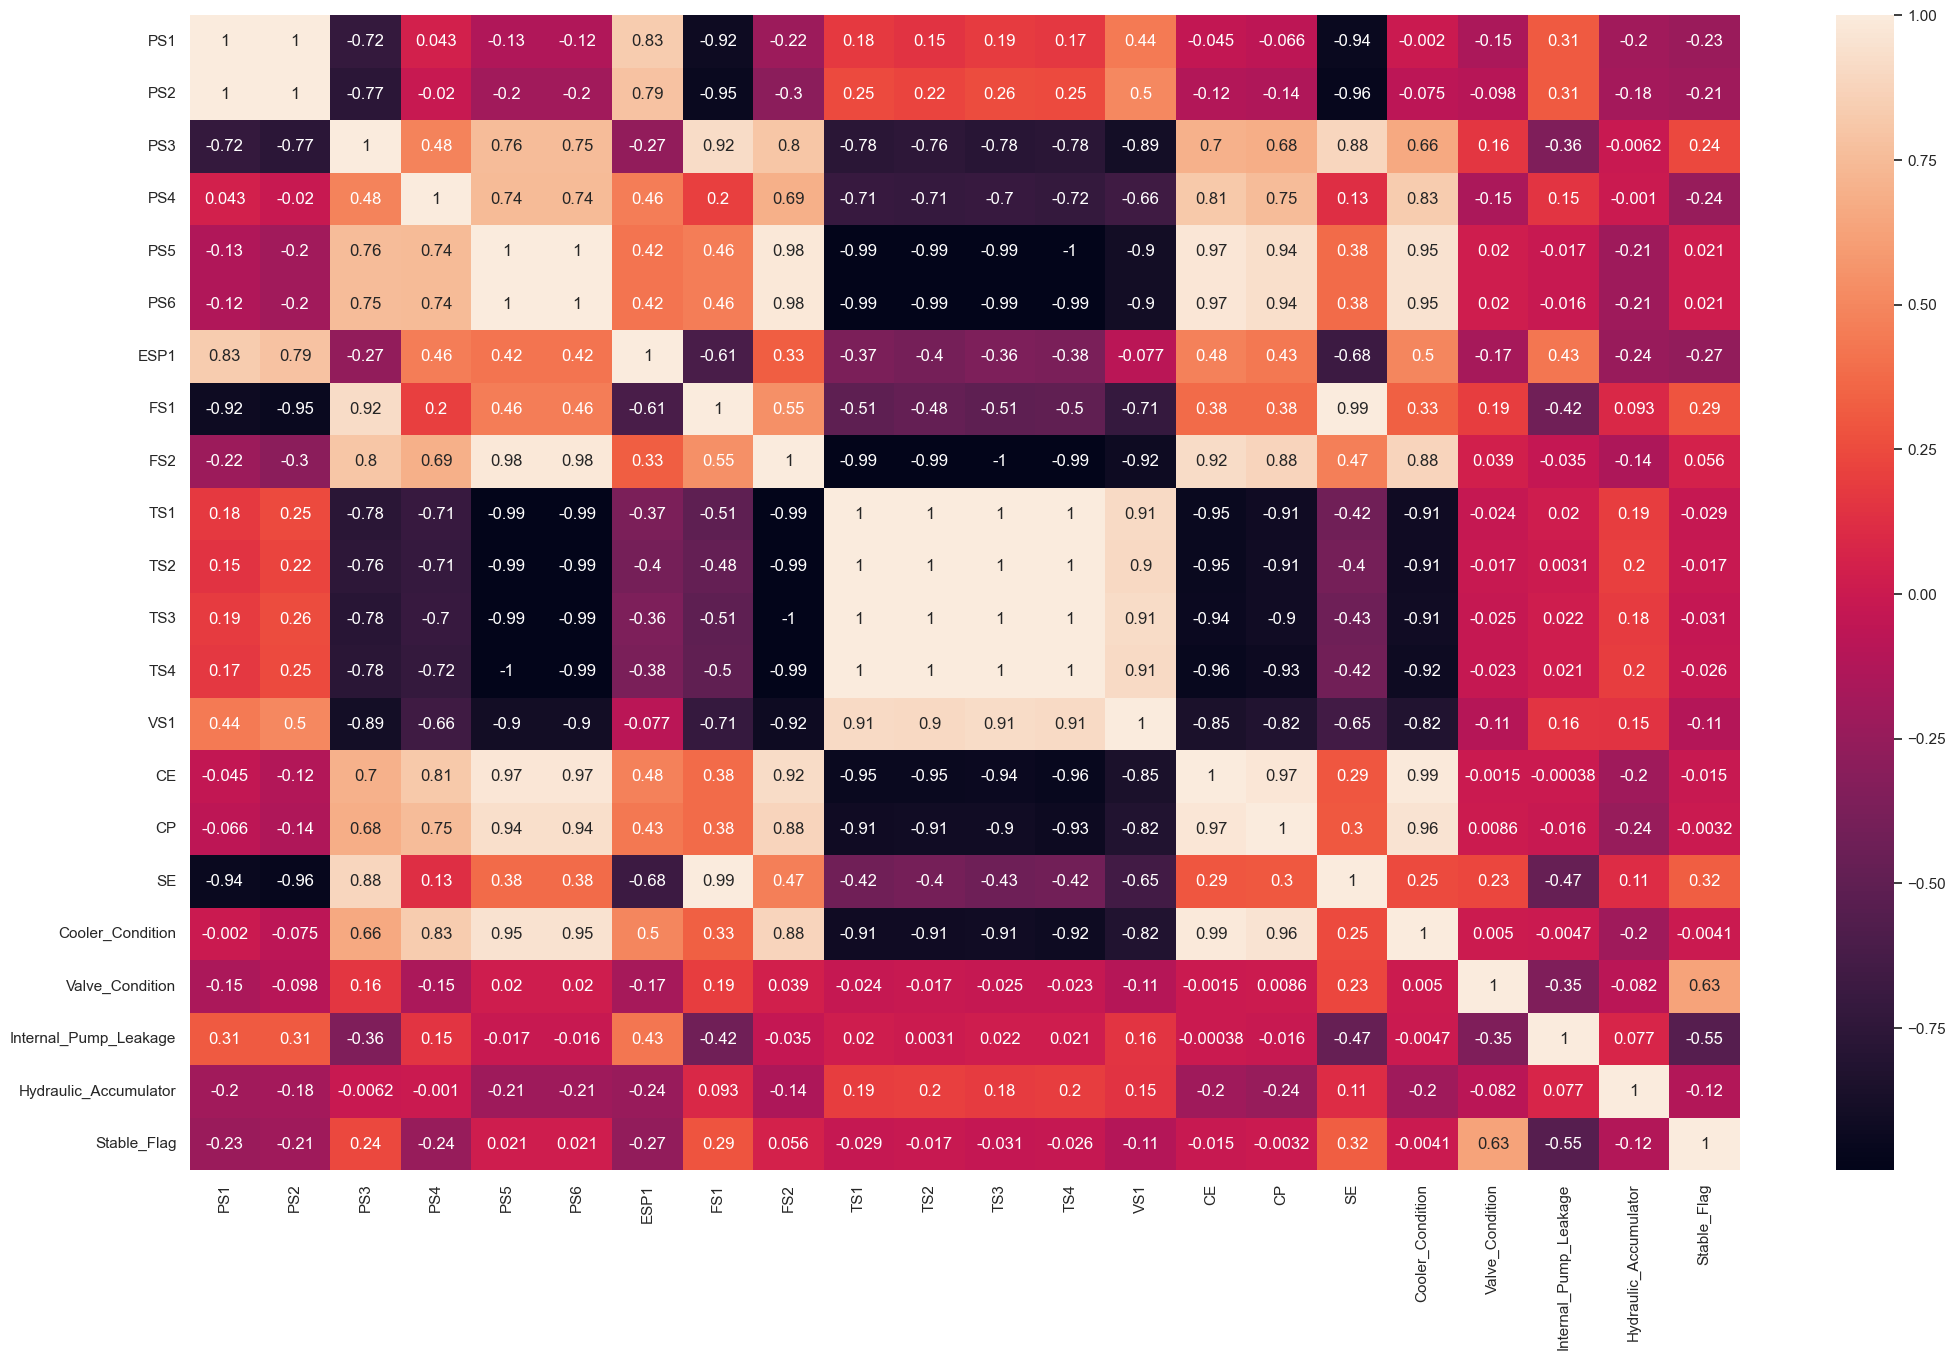

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)



from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_validate,GridSearchCV,RandomizedSearchCV
from tpot import TPOTClassifier
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Data Uploading

# 1- Data Preperation

ps1=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive/PS1.txt")

ps1

ps1.shape

np.isnan(ps1).sum()

ps2=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive/PS2.txt")

ps3=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive/PS3.txt")

ps4=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive/PS4.txt")

ps5=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive/PS5.txt")

ps6=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive/PS6.txt")

ps2

ps1_arr=ps1.mean(axis=1)
ps1_arr

ps2_arr=ps2.mean(axis=1)
ps2_arr

ps3_arr=ps3.mean(axis=1)
ps3_arr

ps4_arr=ps4.mean(axis=1)
ps4_arr

ps5_arr=ps5.mean(axis=1)
ps5_arr

ps6_arr=ps6.mean(axis=1)
ps6_arr

df=pd.DataFrame({"PS1":ps1_arr,"PS2":ps2_arr,"PS3":ps3_arr,"PS4":ps4_arr,"PS5":ps5_arr,"PS6":ps6_arr})

df.head()

eps1=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive/EPS1.txt")

esp1_arr=eps1.mean(axis=1)
esp1_arr

df["ESP1"]=esp1_arr

df.head()

a=[]
for i in ["FS1","FS2"]:
    FS=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive"+"/"+i+".txt")
    a.append(FS)
fs1,fs2=a

fs1_arr=fs1.mean(axis=1)
fs1_arr

fs2_arr=fs2.mean(axis=1)
fs2_arr

df["FS1"]=fs1_arr
df["FS2"]=fs2_arr

df.head()

a=[]
for i in ["TS1","TS2","TS3","TS4"]:
    TS=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive"+"/"+i+".txt")
    a.append(TS)
ts1,ts2,ts3,ts4=a

ts1_arr=ts1.mean(axis=1)
ts1_arr

ts2_arr=ts2.mean(axis=1)
ts2_arr

ts3_arr=ts3.mean(axis=1)
ts3_arr

ts4_arr=ts4.mean(axis=1)
ts4_arr

df["TS1"]=ts1_arr
df["TS2"]=ts2_arr
df["TS3"]=ts3_arr
df["TS4"]=ts4_arr

df.head()

vs1=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive/VS1.txt")

vs1

vs1_arr=vs1.mean(axis=1)
vs1_arr

df["VS1"]=vs1_arr

df.head()

a=[]
for i in ["CE","CP"]:
    C=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive"+"/"+i+".txt")
    a.append(C)
ce,cp=a

ce_arr=ce.mean(axis=1)
ce_arr

cp_arr=cp.mean(axis=1)
cp_arr

df["CE"]=ce_arr
df["CP"]=cp_arr

df.head()

se=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive/SE.txt")

se_arr=se.mean(axis=1)
se_arr

df["SE"]=se_arr

df.head()

target=np.genfromtxt("C:/Users/SystemDynamicsLab/Downloads/datasetforpredictive/profile.txt")

target

target.shape

df_temp=pd.DataFrame(target,columns=["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"])
df_temp.head()

df_final=pd.concat([df,df_temp],axis=1)

df_final.head(20)



df_final.info()

df_final.describe()

# 2- Data Analysis

df_final.var()

df_final.corr()

fig=plt.gcf()
fig.set_size_inches((25,15))
sns.heatmap(df_final.corr(),annot=True)

# fig.savefig("corr.png")

df_final_corr=df_final.corr().sort_values(["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"],ascending=False)
df_final_corr.head()

df_final_corr_target=df_final_corr[["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"]]
df_final_corr_target.drop(["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"],axis=0,inplace=True)

df_final_corr_target

# 3- Data Preprocessing

x=df_final.iloc[:,:-5]

x.head(2)

y=df_final.iloc[:,-5:]

y.head(2)

target_1=y.iloc[:,-5]
target_2=y.iloc[:,-4]
target_3=y.iloc[:,-3]
target_4=y.iloc[:,-2]
final_target=y.iloc[:,-1]
final_target=(final_target.astype(int))

target_1

x.head()

## data splitting target-1

### target incidence



# # Increase the epochs to 100
# history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32)

# # Plot training & validation accuracy values
# plt.figure(figsize=(14, 6))

# plt.subplot(1, 2, 1)
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(loc='upper left')

# # Plot training & validation loss values
# plt.subplot(1, 2, 2)
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend(loc='upper left')

# plt.show()


In [2]:
x2 = df.iloc[:, [6,7]]

X_train1,X_test1,y_train1,y_test1=train_test_split(x2,target_3,test_size=0.2,random_state=1)

In [3]:
x3 = df.iloc[:, [0,1,2,4,5,16]]

X_train2,X_test2,y_train2,y_test2=train_test_split(x3,target_2,test_size=0.2,random_state=1)

In [4]:
y_train2 = y_train2.replace({100: 3, 90: 2, 80: 1,73: 0})
y_test2 = y_test2.replace({100: 3, 90: 2, 80: 1,73: 0})

In [6]:
import tensorflow as tf

In [7]:
model1 = tf.keras.models.load_model('my_model31.h5')  # Model 1 with 2 input columns and 3 classes
model2 = tf.keras.models.load_model('my_model3.h5')  # Model 2 with 6 input columns and 4 classes

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras.callbacks import Callback

# Custom callback to monitor both accuracies
class AccuracyThresholdCheckpoint(Callback):
    def __init__(self, filepath, monitor1='val_output_1_accuracy', monitor2='val_output_2_accuracy', threshold=0.90):
        super(AccuracyThresholdCheckpoint, self).__init__()
        self.filepath = filepath
        self.monitor1 = monitor1
        self.monitor2 = monitor2
        self.threshold = threshold
        self.best = -float('inf')

    def on_epoch_end(self, epoch, logs=None):
        acc1 = logs.get(self.monitor1, 0)
        acc2 = logs.get(self.monitor2, 0)
        if acc1 >= self.threshold and acc2 >= self.threshold:
            self.model.save(self.filepath)
            print(f'\nEpoch {epoch + 1}: Saving model to {self.filepath} (both accuracies >= {self.threshold * 100}%)')

# Load the pre-trained models (without the classification heads)
model1 = tf.keras.models.load_model('my_model31.h5')  # Model 1 with 2 input columns and 3 classes
model2 = tf.keras.models.load_model('my_model3.h5')  # Model 2 with 6 input columns and 4 classes

# Remove the last layers of the models to extract the feature layers
model1_feature_extractor = Model(inputs=model1.input, outputs=model1.layers[-2].output)
model2_feature_extractor = Model(inputs=model2.input, outputs=model2.layers[-2].output)

# Define new input layers for both datasets
input_1 = Input(shape=(2,), name='input_1')  # Input for Model 1 (2 columns)
input_2 = Input(shape=(6,), name='input_2')  # Input for Model 2 (6 columns)

# Extract features from both inputs using the pre-trained models
features_1 = model1_feature_extractor(input_1)  # Features from Model 1
features_2 = model2_feature_extractor(input_2)  # Features from Model 2

# Concatenate the extracted features
merged_features = Concatenate()([features_1, features_2])

# Add shared dense layers
x = Dense(128, activation='relu')(merged_features)
x = Dense(64, activation='relu')(x)

# Define task-specific output heads
output_1 = Dense(3, activation='softmax', name='output_1')(x)  # Output head for Model 1 (3-class classification)
output_2 = Dense(4, activation='softmax', name='output_2')(x)  # Output head for Model 2 (4-class classification)

# Create a combined model with two inputs and two outputs
global_model = Model(inputs=[input_1, input_2], outputs=[output_1, output_2])

# Define the custom accuracy threshold checkpoint callback
accuracy_threshold_checkpoint = AccuracyThresholdCheckpoint(
    filepath='best_model_with_90_accuracy.h5',
    monitor1='val_output_1_accuracy',
    monitor2='val_output_2_accuracy',
    threshold=0.90
)

# Compile the model
global_model.compile(optimizer='adam',
                     loss={'output_1': 'sparse_categorical_crossentropy', 
                           'output_2': 'sparse_categorical_crossentropy'},
                     metrics={'output_1': 'accuracy', 'output_2': 'accuracy'})

# Train the model on both datasets
history = global_model.fit([X_train1, X_train2], 
                           {'output_1': y_train1, 'output_2': y_train2},
                           epochs=399, batch_size=32, validation_split=0.2,
                           callbacks=[accuracy_threshold_checkpoint])


Epoch 1/399
45/45 [==============================] - 2s 9ms/step - loss: 209.5636 - output_1_loss: 89.5652 - output_2_loss: 119.9984 - output_1_accuracy: 0.3912 - output_2_accuracy: 0.3707 - val_loss: 24.0178 - val_output_1_loss: 13.6602 - val_output_2_loss: 10.3575 - val_output_1_accuracy: 0.5892 - val_output_2_accuracy: 0.5099
Epoch 2/399
45/45 [==============================] - 0s 3ms/step - loss: 17.7346 - output_1_loss: 7.7374 - output_2_loss: 9.9971 - output_1_accuracy: 0.3912 - output_2_accuracy: 0.3714 - val_loss: 18.4961 - val_output_1_loss: 8.1107 - val_output_2_loss: 10.3854 - val_output_1_accuracy: 0.5892 - val_output_2_accuracy: 0.1926
Epoch 3/399
45/45 [==============================] - 0s 3ms/step - loss: 14.4751 - output_1_loss: 7.0872 - output_2_loss: 7.3879 - output_1_accuracy: 0.3820 - output_2_accuracy: 0.3600 - val_loss: 6.6835 - val_output_1_loss: 1.3597 - val_output_2_loss: 5.3238 - val_output_1_accuracy: 0.2125 - val_output_2_accuracy: 0.1445
Epoch 4/399
45/45 [

45/45 [==============================] - 0s 3ms/step - loss: 2.5659 - output_1_loss: 1.0701 - output_2_loss: 1.4957 - output_1_accuracy: 0.5734 - output_2_accuracy: 0.4394 - val_loss: 4.2982 - val_output_1_loss: 3.0210 - val_output_2_loss: 1.2772 - val_output_1_accuracy: 0.1983 - val_output_2_accuracy: 0.5127
Epoch 27/399
45/45 [==============================] - 0s 3ms/step - loss: 2.6478 - output_1_loss: 1.1397 - output_2_loss: 1.5081 - output_1_accuracy: 0.5563 - output_2_accuracy: 0.4507 - val_loss: 2.1522 - val_output_1_loss: 0.8692 - val_output_2_loss: 1.2829 - val_output_1_accuracy: 0.6232 - val_output_2_accuracy: 0.5127
Epoch 28/399
45/45 [==============================] - 0s 3ms/step - loss: 2.4171 - output_1_loss: 0.9804 - output_2_loss: 1.4366 - output_1_accuracy: 0.5868 - output_2_accuracy: 0.4833 - val_loss: 2.2480 - val_output_1_loss: 0.9564 - val_output_2_loss: 1.2916 - val_output_1_accuracy: 0.5581 - val_output_2_accuracy: 0.5354
Epoch 29/399
45/45 [=====================

45/45 [==============================] - 0s 3ms/step - loss: 1.3294 - output_1_loss: 0.6163 - output_2_loss: 0.7131 - output_1_accuracy: 0.7179 - output_2_accuracy: 0.7038 - val_loss: 1.6746 - val_output_1_loss: 0.9327 - val_output_2_loss: 0.7420 - val_output_1_accuracy: 0.7337 - val_output_2_accuracy: 0.6827
Epoch 52/399
45/45 [==============================] - 0s 3ms/step - loss: 1.4669 - output_1_loss: 0.7020 - output_2_loss: 0.7649 - output_1_accuracy: 0.7087 - output_2_accuracy: 0.6782 - val_loss: 2.3292 - val_output_1_loss: 1.5489 - val_output_2_loss: 0.7803 - val_output_1_accuracy: 0.5496 - val_output_2_accuracy: 0.6601
Epoch 53/399
45/45 [==============================] - 0s 3ms/step - loss: 1.4395 - output_1_loss: 0.6665 - output_2_loss: 0.7731 - output_1_accuracy: 0.6818 - output_2_accuracy: 0.6655 - val_loss: 1.4109 - val_output_1_loss: 0.6225 - val_output_2_loss: 0.7884 - val_output_1_accuracy: 0.7167 - val_output_2_accuracy: 0.6261
Epoch 54/399
45/45 [=====================

45/45 [==============================] - 0s 3ms/step - loss: 1.2794 - output_1_loss: 0.5884 - output_2_loss: 0.6910 - output_1_accuracy: 0.7023 - output_2_accuracy: 0.7137 - val_loss: 1.2621 - val_output_1_loss: 0.5913 - val_output_2_loss: 0.6708 - val_output_1_accuracy: 0.7252 - val_output_2_accuracy: 0.6941
Epoch 77/399
45/45 [==============================] - 0s 3ms/step - loss: 1.2498 - output_1_loss: 0.5638 - output_2_loss: 0.6860 - output_1_accuracy: 0.7179 - output_2_accuracy: 0.7009 - val_loss: 1.2843 - val_output_1_loss: 0.5460 - val_output_2_loss: 0.7383 - val_output_1_accuracy: 0.6686 - val_output_2_accuracy: 0.6742
Epoch 78/399
45/45 [==============================] - 0s 3ms/step - loss: 1.2006 - output_1_loss: 0.5511 - output_2_loss: 0.6495 - output_1_accuracy: 0.7165 - output_2_accuracy: 0.7271 - val_loss: 1.3366 - val_output_1_loss: 0.5988 - val_output_2_loss: 0.7378 - val_output_1_accuracy: 0.7592 - val_output_2_accuracy: 0.7082
Epoch 79/399
45/45 [=====================

45/45 [==============================] - 0s 3ms/step - loss: 1.1685 - output_1_loss: 0.5444 - output_2_loss: 0.6242 - output_1_accuracy: 0.7406 - output_2_accuracy: 0.7307 - val_loss: 1.1916 - val_output_1_loss: 0.4920 - val_output_2_loss: 0.6995 - val_output_1_accuracy: 0.7422 - val_output_2_accuracy: 0.7195
Epoch 102/399
45/45 [==============================] - 0s 3ms/step - loss: 1.0915 - output_1_loss: 0.4899 - output_2_loss: 0.6016 - output_1_accuracy: 0.7527 - output_2_accuracy: 0.7364 - val_loss: 1.2300 - val_output_1_loss: 0.5591 - val_output_2_loss: 0.6710 - val_output_1_accuracy: 0.6997 - val_output_2_accuracy: 0.6799
Epoch 103/399
45/45 [==============================] - 0s 3ms/step - loss: 1.1531 - output_1_loss: 0.5610 - output_2_loss: 0.5920 - output_1_accuracy: 0.7413 - output_2_accuracy: 0.7392 - val_loss: 1.3398 - val_output_1_loss: 0.6761 - val_output_2_loss: 0.6637 - val_output_1_accuracy: 0.6912 - val_output_2_accuracy: 0.6799
Epoch 104/399
45/45 [==================

45/45 [==============================] - 0s 3ms/step - loss: 1.1020 - output_1_loss: 0.4987 - output_2_loss: 0.6033 - output_1_accuracy: 0.7590 - output_2_accuracy: 0.7321 - val_loss: 1.3013 - val_output_1_loss: 0.6296 - val_output_2_loss: 0.6717 - val_output_1_accuracy: 0.7054 - val_output_2_accuracy: 0.6912
Epoch 127/399
45/45 [==============================] - 0s 3ms/step - loss: 1.0698 - output_1_loss: 0.5054 - output_2_loss: 0.5643 - output_1_accuracy: 0.7527 - output_2_accuracy: 0.7491 - val_loss: 1.1431 - val_output_1_loss: 0.4506 - val_output_2_loss: 0.6925 - val_output_1_accuracy: 0.7847 - val_output_2_accuracy: 0.6827
Epoch 128/399
45/45 [==============================] - 0s 3ms/step - loss: 1.0120 - output_1_loss: 0.4569 - output_2_loss: 0.5551 - output_1_accuracy: 0.7732 - output_2_accuracy: 0.7675 - val_loss: 1.1017 - val_output_1_loss: 0.5495 - val_output_2_loss: 0.5522 - val_output_1_accuracy: 0.7564 - val_output_2_accuracy: 0.7422
Epoch 129/399
45/45 [==================

45/45 [==============================] - 0s 3ms/step - loss: 1.0027 - output_1_loss: 0.4720 - output_2_loss: 0.5307 - output_1_accuracy: 0.7690 - output_2_accuracy: 0.7682 - val_loss: 1.4955 - val_output_1_loss: 0.4437 - val_output_2_loss: 1.0518 - val_output_1_accuracy: 0.7847 - val_output_2_accuracy: 0.5921
Epoch 152/399
45/45 [==============================] - 0s 3ms/step - loss: 1.1136 - output_1_loss: 0.5501 - output_2_loss: 0.5635 - output_1_accuracy: 0.7498 - output_2_accuracy: 0.7760 - val_loss: 1.1964 - val_output_1_loss: 0.5557 - val_output_2_loss: 0.6407 - val_output_1_accuracy: 0.7422 - val_output_2_accuracy: 0.7167
Epoch 153/399
45/45 [==============================] - 0s 3ms/step - loss: 1.0041 - output_1_loss: 0.4616 - output_2_loss: 0.5425 - output_1_accuracy: 0.7760 - output_2_accuracy: 0.7789 - val_loss: 1.1080 - val_output_1_loss: 0.4478 - val_output_2_loss: 0.6602 - val_output_1_accuracy: 0.7847 - val_output_2_accuracy: 0.6997
Epoch 154/399
45/45 [==================

45/45 [==============================] - 0s 3ms/step - loss: 0.7267 - output_1_loss: 0.3428 - output_2_loss: 0.3838 - output_1_accuracy: 0.8327 - output_2_accuracy: 0.8632 - val_loss: 1.0071 - val_output_1_loss: 0.3447 - val_output_2_loss: 0.6625 - val_output_1_accuracy: 0.8442 - val_output_2_accuracy: 0.6771
Epoch 177/399
45/45 [==============================] - 0s 3ms/step - loss: 0.7447 - output_1_loss: 0.3236 - output_2_loss: 0.4211 - output_1_accuracy: 0.8398 - output_2_accuracy: 0.8320 - val_loss: 1.0672 - val_output_1_loss: 0.3360 - val_output_2_loss: 0.7312 - val_output_1_accuracy: 0.8470 - val_output_2_accuracy: 0.6431
Epoch 178/399
45/45 [==============================] - 0s 3ms/step - loss: 0.7293 - output_1_loss: 0.3225 - output_2_loss: 0.4069 - output_1_accuracy: 0.8512 - output_2_accuracy: 0.8519 - val_loss: 1.1246 - val_output_1_loss: 0.4872 - val_output_2_loss: 0.6374 - val_output_1_accuracy: 0.7479 - val_output_2_accuracy: 0.6941
Epoch 179/399
45/45 [==================

45/45 [==============================] - 0s 3ms/step - loss: 0.8420 - output_1_loss: 0.2438 - output_2_loss: 0.5982 - output_1_accuracy: 0.8965 - output_2_accuracy: 0.7711 - val_loss: 0.7992 - val_output_1_loss: 0.3894 - val_output_2_loss: 0.4098 - val_output_1_accuracy: 0.8159 - val_output_2_accuracy: 0.8555
Epoch 202/399
45/45 [==============================] - 0s 3ms/step - loss: 0.6746 - output_1_loss: 0.2712 - output_2_loss: 0.4034 - output_1_accuracy: 0.8746 - output_2_accuracy: 0.8455 - val_loss: 0.7951 - val_output_1_loss: 0.3225 - val_output_2_loss: 0.4726 - val_output_1_accuracy: 0.8470 - val_output_2_accuracy: 0.8130
Epoch 203/399
45/45 [==============================] - 0s 3ms/step - loss: 0.5526 - output_1_loss: 0.2148 - output_2_loss: 0.3377 - output_1_accuracy: 0.9128 - output_2_accuracy: 0.8916 - val_loss: 0.6585 - val_output_1_loss: 0.2365 - val_output_2_loss: 0.4220 - val_output_1_accuracy: 0.9065 - val_output_2_accuracy: 0.8385
Epoch 204/399
45/45 [==================

C:\Users\SystemDynamicsLab\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


45/45 [==============================] - 0s 3ms/step - loss: 0.5256 - output_1_loss: 0.1483 - output_2_loss: 0.3773 - output_1_accuracy: 0.9391 - output_2_accuracy: 0.8575 - val_loss: 0.9646 - val_output_1_loss: 0.2751 - val_output_2_loss: 0.6895 - val_output_1_accuracy: 0.8669 - val_output_2_accuracy: 0.6629
Epoch 221/399
45/45 [==============================] - 0s 3ms/step - loss: 0.5574 - output_1_loss: 0.1810 - output_2_loss: 0.3764 - output_1_accuracy: 0.9121 - output_2_accuracy: 0.8568 - val_loss: 0.5231 - val_output_1_loss: 0.1654 - val_output_2_loss: 0.3577 - val_output_1_accuracy: 0.9263 - val_output_2_accuracy: 0.8952
Epoch 222/399
26/45 [================>.............] - ETA: 0s - loss: 0.4736 - output_1_loss: 0.1603 - output_2_loss: 0.3133 - output_1_accuracy: 0.9231 - output_2_accuracy: 0.9050
Epoch 222: Saving model to best_model_with_90_accuracy.h5 (both accuracies >= 90.0%)
45/45 [==============================] - 0s 5ms/step - loss: 0.4561 - output_1_loss: 0.1460 - out

Epoch 244/399
45/45 [==============================] - 0s 2ms/step - loss: 0.5626 - output_1_loss: 0.1372 - output_2_loss: 0.4254 - output_1_accuracy: 0.9383 - output_2_accuracy: 0.8235 - val_loss: 0.4487 - val_output_1_loss: 0.1416 - val_output_2_loss: 0.3071 - val_output_1_accuracy: 0.9547 - val_output_2_accuracy: 0.8895
Epoch 245/399
45/45 [==============================] - 0s 3ms/step - loss: 0.4134 - output_1_loss: 0.1180 - output_2_loss: 0.2954 - output_1_accuracy: 0.9433 - output_2_accuracy: 0.9008 - val_loss: 0.8677 - val_output_1_loss: 0.1683 - val_output_2_loss: 0.6994 - val_output_1_accuracy: 0.9348 - val_output_2_accuracy: 0.6969
Epoch 246/399
45/45 [==============================] - 0s 3ms/step - loss: 0.4090 - output_1_loss: 0.1190 - output_2_loss: 0.2899 - output_1_accuracy: 0.9412 - output_2_accuracy: 0.9008 - val_loss: 0.5170 - val_output_1_loss: 0.1400 - val_output_2_loss: 0.3771 - val_output_1_accuracy: 0.9433 - val_output_2_accuracy: 0.8555
Epoch 247/399
20/45 [====

45/45 [==============================] - 0s 3ms/step - loss: 0.4364 - output_1_loss: 0.1260 - output_2_loss: 0.3104 - output_1_accuracy: 0.9433 - output_2_accuracy: 0.8831 - val_loss: 0.6878 - val_output_1_loss: 0.1609 - val_output_2_loss: 0.5269 - val_output_1_accuracy: 0.9320 - val_output_2_accuracy: 0.7564
Epoch 266/399
45/45 [==============================] - 0s 3ms/step - loss: 0.6577 - output_1_loss: 0.1455 - output_2_loss: 0.5122 - output_1_accuracy: 0.9235 - output_2_accuracy: 0.8009 - val_loss: 0.6472 - val_output_1_loss: 0.1400 - val_output_2_loss: 0.5073 - val_output_1_accuracy: 0.9377 - val_output_2_accuracy: 0.7620
Epoch 267/399
45/45 [==============================] - 0s 3ms/step - loss: 0.4164 - output_1_loss: 0.1035 - output_2_loss: 0.3129 - output_1_accuracy: 0.9504 - output_2_accuracy: 0.8838 - val_loss: 0.7446 - val_output_1_loss: 0.2128 - val_output_2_loss: 0.5318 - val_output_1_accuracy: 0.9037 - val_output_2_accuracy: 0.7592
Epoch 268/399
45/45 [==================

Epoch 289/399
45/45 [==============================] - 0s 3ms/step - loss: 0.5414 - output_1_loss: 0.1839 - output_2_loss: 0.3575 - output_1_accuracy: 0.9171 - output_2_accuracy: 0.8661 - val_loss: 1.5176 - val_output_1_loss: 0.1616 - val_output_2_loss: 1.3560 - val_output_1_accuracy: 0.9263 - val_output_2_accuracy: 0.5751
Epoch 290/399
45/45 [==============================] - 0s 3ms/step - loss: 0.5211 - output_1_loss: 0.1199 - output_2_loss: 0.4012 - output_1_accuracy: 0.9383 - output_2_accuracy: 0.8455 - val_loss: 0.4477 - val_output_1_loss: 0.1332 - val_output_2_loss: 0.3145 - val_output_1_accuracy: 0.9377 - val_output_2_accuracy: 0.8924
Epoch 291/399
45/45 [==============================] - 0s 3ms/step - loss: 0.3673 - output_1_loss: 0.0999 - output_2_loss: 0.2675 - output_1_accuracy: 0.9483 - output_2_accuracy: 0.9213 - val_loss: 0.4256 - val_output_1_loss: 0.1212 - val_output_2_loss: 0.3044 - val_output_1_accuracy: 0.9547 - val_output_2_accuracy: 0.8924
Epoch 292/399
27/45 [====

45/45 [==============================] - 0s 3ms/step - loss: 0.5568 - output_1_loss: 0.1115 - output_2_loss: 0.4453 - output_1_accuracy: 0.9433 - output_2_accuracy: 0.8292 - val_loss: 0.5935 - val_output_1_loss: 0.1260 - val_output_2_loss: 0.4675 - val_output_1_accuracy: 0.9518 - val_output_2_accuracy: 0.8045
Epoch 311/399
45/45 [==============================] - 0s 3ms/step - loss: 0.4038 - output_1_loss: 0.1011 - output_2_loss: 0.3027 - output_1_accuracy: 0.9447 - output_2_accuracy: 0.8859 - val_loss: 0.4576 - val_output_1_loss: 0.1261 - val_output_2_loss: 0.3315 - val_output_1_accuracy: 0.9490 - val_output_2_accuracy: 0.8697
Epoch 312/399
45/45 [==============================] - 0s 3ms/step - loss: 0.3990 - output_1_loss: 0.0965 - output_2_loss: 0.3025 - output_1_accuracy: 0.9511 - output_2_accuracy: 0.8845 - val_loss: 3.5818 - val_output_1_loss: 0.2621 - val_output_2_loss: 3.3197 - val_output_1_accuracy: 0.8895 - val_output_2_accuracy: 0.2295
Epoch 313/399
45/45 [==================

Epoch 334/399
45/45 [==============================] - 0s 3ms/step - loss: 0.7164 - output_1_loss: 0.1642 - output_2_loss: 0.5522 - output_1_accuracy: 0.9220 - output_2_accuracy: 0.7810 - val_loss: 0.4743 - val_output_1_loss: 0.1312 - val_output_2_loss: 0.3431 - val_output_1_accuracy: 0.9433 - val_output_2_accuracy: 0.8782
Epoch 335/399
45/45 [==============================] - 0s 3ms/step - loss: 0.5030 - output_1_loss: 0.1687 - output_2_loss: 0.3343 - output_1_accuracy: 0.9213 - output_2_accuracy: 0.8675 - val_loss: 0.7836 - val_output_1_loss: 0.4392 - val_output_2_loss: 0.3444 - val_output_1_accuracy: 0.7790 - val_output_2_accuracy: 0.8555
Epoch 336/399
45/45 [==============================] - 0s 3ms/step - loss: 0.4941 - output_1_loss: 0.1845 - output_2_loss: 0.3096 - output_1_accuracy: 0.9114 - output_2_accuracy: 0.8894 - val_loss: 0.5577 - val_output_1_loss: 0.2482 - val_output_2_loss: 0.3095 - val_output_1_accuracy: 0.8924 - val_output_2_accuracy: 0.8839
Epoch 337/399
45/45 [====

32/45 [====================>.........] - ETA: 0s - loss: 0.3360 - output_1_loss: 0.0994 - output_2_loss: 0.2366 - output_1_accuracy: 0.9570 - output_2_accuracy: 0.9180
Epoch 358: Saving model to best_model_with_90_accuracy.h5 (both accuracies >= 90.0%)
45/45 [==============================] - 0s 4ms/step - loss: 0.3270 - output_1_loss: 0.0932 - output_2_loss: 0.2338 - output_1_accuracy: 0.9568 - output_2_accuracy: 0.9185 - val_loss: 0.3813 - val_output_1_loss: 0.1246 - val_output_2_loss: 0.2568 - val_output_1_accuracy: 0.9462 - val_output_2_accuracy: 0.9093
Epoch 359/399
45/45 [==============================] - 0s 3ms/step - loss: 0.3865 - output_1_loss: 0.0906 - output_2_loss: 0.2959 - output_1_accuracy: 0.9575 - output_2_accuracy: 0.8937 - val_loss: 1.0699 - val_output_1_loss: 0.1499 - val_output_2_loss: 0.9200 - val_output_1_accuracy: 0.9320 - val_output_2_accuracy: 0.6601
Epoch 360/399
45/45 [==============================] - 0s 3ms/step - loss: 0.6958 - output_1_loss: 0.2442 - out

45/45 [==============================] - 0s 3ms/step - loss: 0.3502 - output_1_loss: 0.0919 - output_2_loss: 0.2583 - output_1_accuracy: 0.9511 - output_2_accuracy: 0.9114 - val_loss: 0.4476 - val_output_1_loss: 0.1368 - val_output_2_loss: 0.3108 - val_output_1_accuracy: 0.9518 - val_output_2_accuracy: 0.8924
Epoch 381/399
27/45 [=================>............] - ETA: 0s - loss: 0.3407 - output_1_loss: 0.0816 - output_2_loss: 0.2590 - output_1_accuracy: 0.9491 - output_2_accuracy: 0.9028
Epoch 381: Saving model to best_model_with_90_accuracy.h5 (both accuracies >= 90.0%)
45/45 [==============================] - 0s 4ms/step - loss: 0.3353 - output_1_loss: 0.0896 - output_2_loss: 0.2457 - output_1_accuracy: 0.9511 - output_2_accuracy: 0.9135 - val_loss: 0.3872 - val_output_1_loss: 0.1211 - val_output_2_loss: 0.2661 - val_output_1_accuracy: 0.9518 - val_output_2_accuracy: 0.9065
Epoch 382/399
45/45 [==============================] - 0s 3ms/step - loss: 0.3673 - output_1_loss: 0.0902 - out

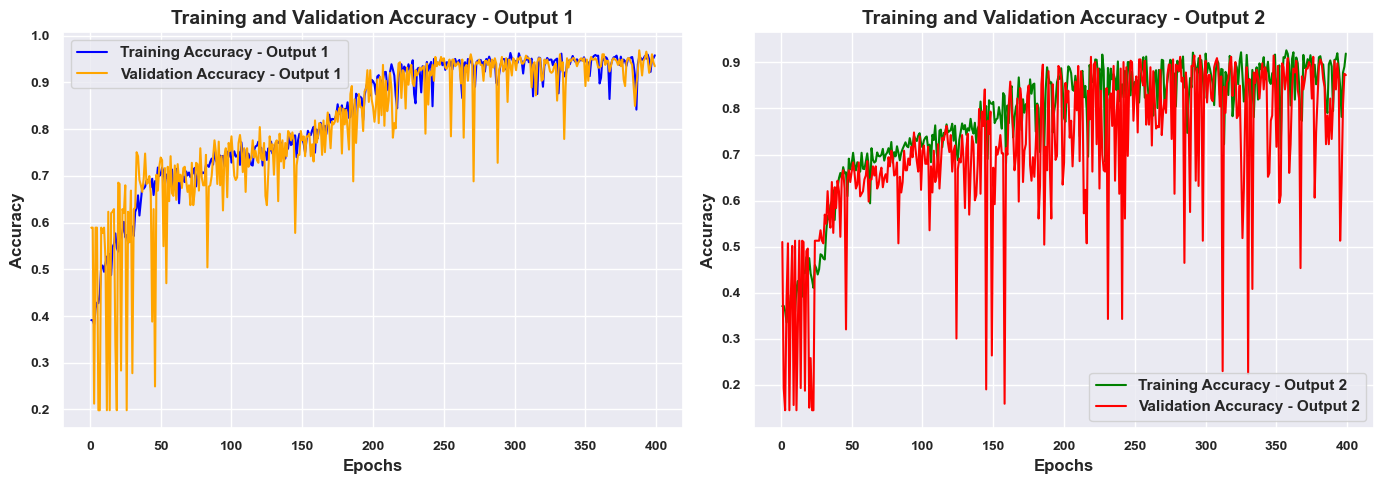

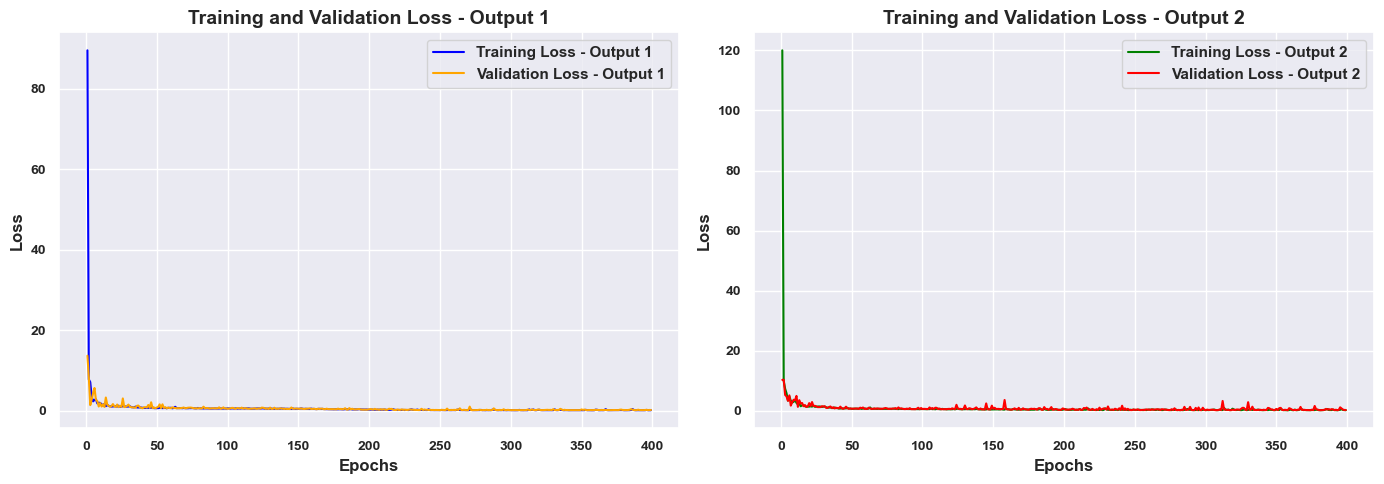

In [14]:
import matplotlib.pyplot as plt

# Extract accuracy and loss from history
acc_output_1 = history.history['output_1_accuracy']
val_acc_output_1 = history.history['val_output_1_accuracy']
acc_output_2 = history.history['output_2_accuracy']
val_acc_output_2 = history.history['val_output_2_accuracy']

loss_output_1 = history.history['output_1_loss']
val_loss_output_1 = history.history['val_output_1_loss']
loss_output_2 = history.history['output_2_loss']
val_loss_output_2 = history.history['val_output_2_loss']

epochs = range(1, len(acc_output_1) + 1)

# Plot accuracy for Output 1
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc_output_1, label='Training Accuracy - Output 1', color='blue')
plt.plot(epochs, val_acc_output_1, label='Validation Accuracy - Output 1', color='orange')
plt.title('Training and Validation Accuracy - Output 1', fontsize=14, fontweight='bold')
plt.xlabel('Epochs', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')  # Bold x-axis points
plt.yticks(fontsize=10, fontweight='bold')  # Bold y-axis points
plt.legend(fontsize=10, title_fontsize=12, prop={'weight': 'bold'}, frameon=True)

# Plot accuracy for Output 2
plt.subplot(1, 2, 2)
plt.plot(epochs, acc_output_2, label='Training Accuracy - Output 2', color='green')
plt.plot(epochs, val_acc_output_2, label='Validation Accuracy - Output 2', color='red')
plt.title('Training and Validation Accuracy - Output 2', fontsize=14, fontweight='bold')
plt.xlabel('Epochs', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')  # Bold x-axis points
plt.yticks(fontsize=10, fontweight='bold')  # Bold y-axis points
plt.legend(fontsize=10, title_fontsize=12, prop={'weight': 'bold'}, frameon=True)

plt.tight_layout()
output_path = r"C:\Users\SystemDynamicsLab\OneDrive - IIT Indore\Pictures\Camera Roll\accu.svg"
plt.savefig(output_path, dpi=1000, bbox_inches='tight')
plt.show()

# Plot loss for Output 1
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss_output_1, label='Training Loss - Output 1', color='blue')
plt.plot(epochs, val_loss_output_1, label='Validation Loss - Output 1', color='orange')
plt.title('Training and Validation Loss - Output 1', fontsize=14, fontweight='bold')
plt.xlabel('Epochs', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')  # Bold x-axis points
plt.yticks(fontsize=10, fontweight='bold')  # Bold y-axis points
plt.legend(fontsize=10, title_fontsize=12, prop={'weight': 'bold'}, frameon=True)

# Plot loss for Output 2
plt.subplot(1, 2, 2)
plt.plot(epochs, loss_output_2, label='Training Loss - Output 2', color='green')
plt.plot(epochs, val_loss_output_2, label='Validation Loss - Output 2', color='red')
plt.title('Training and Validation Loss - Output 2', fontsize=14, fontweight='bold')
plt.xlabel('Epochs', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')  # Bold x-axis points
plt.yticks(fontsize=10, fontweight='bold')  # Bold y-axis points
plt.legend(fontsize=10, title_fontsize=12, prop={'weight': 'bold'}, frameon=True)

plt.tight_layout()

output_path = r"C:\Users\SystemDynamicsLab\OneDrive - IIT Indore\Pictures\Camera Roll\accu&loss.svg"
plt.savefig(output_path, dpi=1000, bbox_inches='tight')

plt.show()


In [15]:
# Step 1: Evaluate on Dataset 1 (2 columns, 3 classes)
print("Evaluating on Dataset 1 (2 columns, 3 classes):")
results_1 = global_model.evaluate([X_test1, X_test2], {'output_1': y_test1}, verbose=2)

# Step 2: Evaluate on Dataset 2 (6 columns, 4 classes)
print("\nEvaluating on Dataset 2 (6 columns, 4 classes):")
results_2 = global_model.evaluate([X_test1, X_test2], {'output_2': y_test2}, verbose=2)

# Step 3: Print the results for both datasets
# Results_1 will contain: [total_loss, output_1_loss, output_2_loss, output_1_accuracy, output_2_accuracy]
print(f"\nResults on Dataset 1 (3-class classification):")
print(f"Total Loss: {results_1[0]}, Output 1 Loss: {results_1[1]}, Output 1 Accuracy: {results_1[3]}")

# Results_2 will contain: [total_loss, output_1_loss, output_2_loss, output_1_accuracy, output_2_accuracy]
print(f"\nResults on Dataset 2 (4-class classification):")
print(f"Total Loss: {results_2[0]}, Output 2 Loss: {results_2[2]}, Output 2 Accuracy: {results_2[4]}")


Evaluating on Dataset 1 (2 columns, 3 classes):
14/14 - 0s - loss: 0.1187 - output_1_loss: 0.1187 - output_2_loss: 0.0000e+00 - output_1_accuracy: 0.9524 - output_2_accuracy: 0.0000e+00 - 174ms/epoch - 12ms/step

Evaluating on Dataset 2 (6 columns, 4 classes):
14/14 - 0s - loss: 0.2991 - output_1_loss: 0.0000e+00 - output_2_loss: 0.2991 - output_1_accuracy: 0.0000e+00 - output_2_accuracy: 0.9161 - 161ms/epoch - 12ms/step

Results on Dataset 1 (3-class classification):
Total Loss: 0.11873297393321991, Output 1 Loss: 0.11873297393321991, Output 1 Accuracy: 0.9523809552192688

Results on Dataset 2 (4-class classification):
Total Loss: 0.2991075813770294, Output 2 Loss: 0.2991075813770294, Output 2 Accuracy: 0.9160997867584229


Predicting on Dataset 1 (2 columns, 3 classes):
14/14 [==============================] - 0s 1ms/step

Predicting on Dataset 2 (6 columns, 4 classes):
14/14 [==============================] - 0s 1ms/step


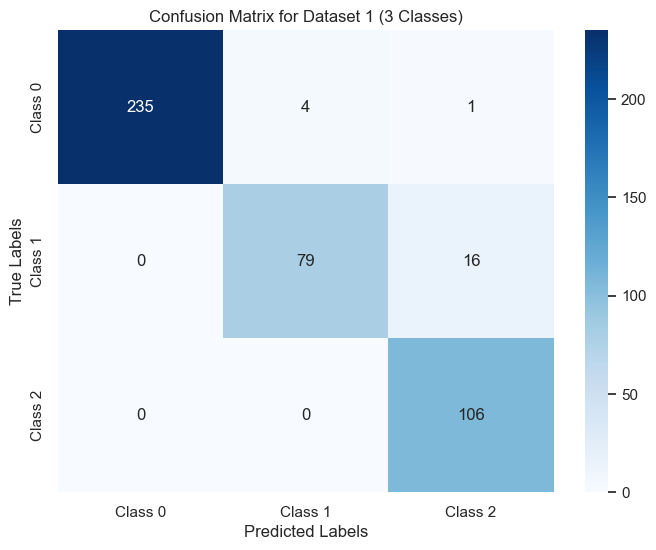

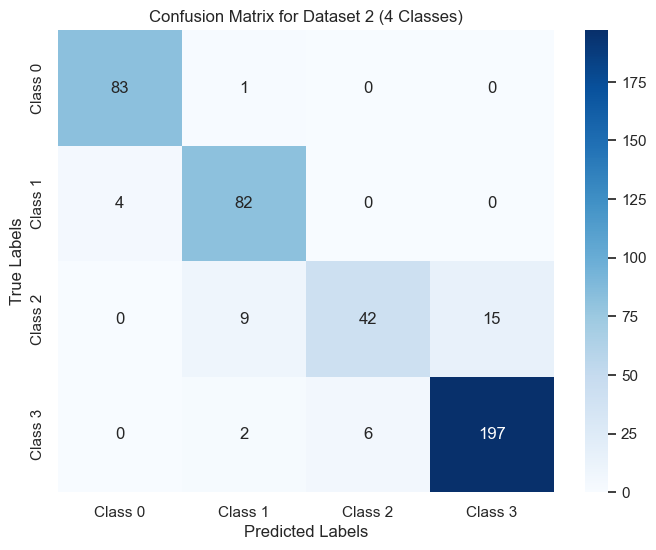

In [16]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, class_names, dataset_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix for {dataset_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Step 1: Predictions on Dataset 1 (2 columns, 3 classes)
print("Predicting on Dataset 1 (2 columns, 3 classes):")
preds_1 = np.argmax(global_model.predict([X_test1, X_test2])[0], axis=1)  # Use the first output (output_1)
cm_1 = confusion_matrix(y_test1, preds_1)

# Step 2: Predictions on Dataset 2 (6 columns, 4 classes)
print("\nPredicting on Dataset 2 (6 columns, 4 classes):")
preds_2 = np.argmax(global_model.predict([X_test1, X_test2])[1], axis=1)  # Use the second output (output_2)
cm_2 = confusion_matrix(y_test2, preds_2)

# Step 3: Plot Confusion Matrices for both datasets
plot_confusion_matrix(cm_1, class_names=['Class 0', 'Class 1', 'Class 2'], dataset_name='Dataset 1 (3 Classes)')
plot_confusion_matrix(cm_2, class_names=['Class 0', 'Class 1', 'Class 2', 'Class 3'], dataset_name='Dataset 2 (4 Classes)')


Predicting on Dataset 1 (2 columns, 3 classes):
14/14 [==============================] - 0s 551us/step


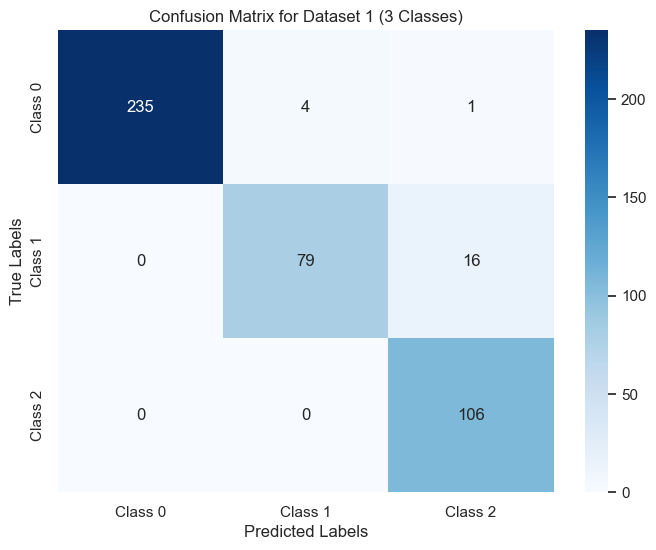


Classification Metrics:
Class Class 0:
  Precision: 1.0000
  Recall: 0.9792
  F1 Score: 0.9895
Class Class 1:
  Precision: 0.9518
  Recall: 0.8316
  F1 Score: 0.8876
Class Class 2:
  Precision: 0.8618
  Recall: 1.0000
  F1 Score: 0.9258

Predicting on Dataset 2 (6 columns, 4 classes):
14/14 [==============================] - 0s 1ms/step


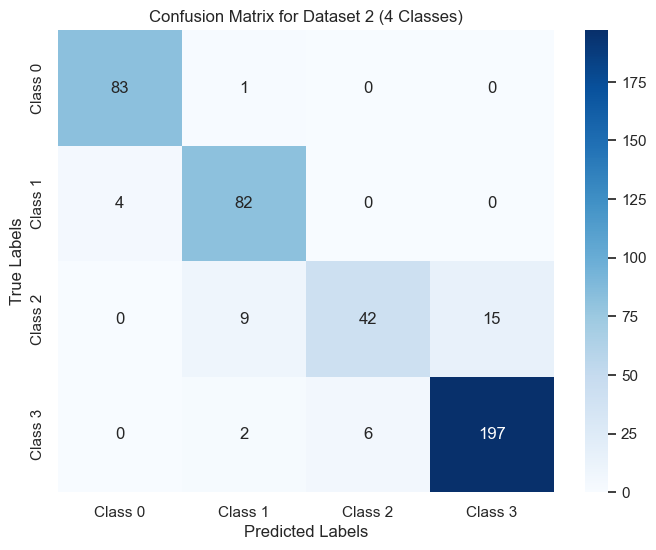


Classification Metrics:
Class Class 0:
  Precision: 0.9540
  Recall: 0.9881
  F1 Score: 0.9708
Class Class 1:
  Precision: 0.8723
  Recall: 0.9535
  F1 Score: 0.9111
Class Class 2:
  Precision: 0.8750
  Recall: 0.6364
  F1 Score: 0.7368
Class Class 3:
  Precision: 0.9292
  Recall: 0.9610
  F1 Score: 0.9448


In [17]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, class_names, dataset_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix for {dataset_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Function to print precision, recall, and F1 score
def print_classification_metrics(y_true, y_pred, class_names):
    print("\nClassification Metrics:")
    precision = precision_score(y_true, y_pred, average=None)
    recall = recall_score(y_true, y_pred, average=None)
    f1 = f1_score(y_true, y_pred, average=None)
    
    for i, class_name in enumerate(class_names):
        print(f"Class {class_name}:")
        print(f"  Precision: {precision[i]:.4f}")
        print(f"  Recall: {recall[i]:.4f}")
        print(f"  F1 Score: {f1[i]:.4f}")

# Step 1: Predictions on Dataset 1 (2 columns, 3 classes)
print("Predicting on Dataset 1 (2 columns, 3 classes):")
preds_1 = np.argmax(global_model.predict([X_test1, X_test2])[0], axis=1)  # Use the first output (output_1)
cm_1 = confusion_matrix(y_test1, preds_1)
plot_confusion_matrix(cm_1, class_names=['Class 0', 'Class 1', 'Class 2'], dataset_name='Dataset 1 (3 Classes)')
print_classification_metrics(y_test1, preds_1, class_names=['Class 0', 'Class 1', 'Class 2'])

# Step 2: Predictions on Dataset 2 (6 columns, 4 classes)
print("\nPredicting on Dataset 2 (6 columns, 4 classes):")
preds_2 = np.argmax(global_model.predict([X_test1, X_test2])[1], axis=1)  # Use the second output (output_2)
cm_2 = confusion_matrix(y_test2, preds_2)
plot_confusion_matrix(cm_2, class_names=['Class 0', 'Class 1', 'Class 2', 'Class 3'], dataset_name='Dataset 2 (4 Classes)')
print_classification_metrics(y_test2, preds_2, class_names=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
